<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du lagrangien augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problèmes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La spécification est donnée dans le fichier.
2. Vérifier que les tests ci-dessous passent.
 

In [39]:
include("../src/Lagrangien_Augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des résultats des algorithmes : false



Test Summary:         | Pass  Total  Time
Lagrangien augmenté   |   12     12  1.2s


## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.

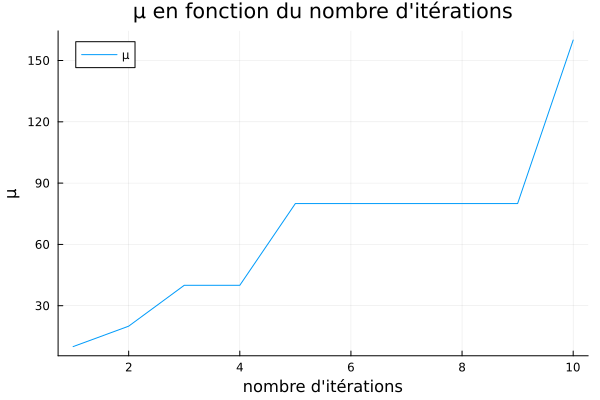

In [3]:

using Plots

include("../test/fonctions_de_tests.jl")
include("../src/Lagrangien_Augmente.jl")

# La tolérance utilisée dans les tests
tol_erreur = 1e-4

# initialisation des paramètres
tol = 1e-5 # tol_abs et tol_rel

# Les trois algorithmes d'optimisations sans contraintes utlisés
algos = ["newton", "rc-cauchy", "rc-gct"]
algo = algos[3]

f1 = fct1; gf1 = grad_fct1; Hf1 = hess_fct1; c1 = contrainte1; gc1 = grad_contrainte1; Hc1 = hess_contrainte1
f2 = fct2; gf2 = grad_fct2; Hf2 = hess_fct2; c2 = contrainte2; gc2 = grad_contrainte2; Hc2 = hess_contrainte2
x01 = pts2.x01
x02 = pts2.x02
x03 = pts2.x03
x04 = pts2.x04

x0 = x01
x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f1, gf1, Hf1, c1, gc1, Hc1, x0, tol_abs=tol, tol_rel=tol, algo_noc=algo)

plot(μs, label="μ", title="μ en fonction du nombre d'itérations", xlabel="nombre d'itérations", ylabel="μ")

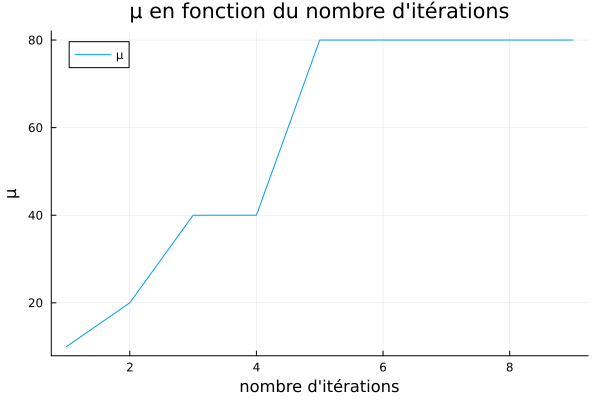

In [4]:
x0 = x02
x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f1, gf1, Hf1, c1, gc1, Hc1, x0, tol_abs=tol, tol_rel=tol, algo_noc=algo)

plot(μs, label="μ", title="μ en fonction du nombre d'itérations", xlabel="nombre d'itérations", ylabel="μ")

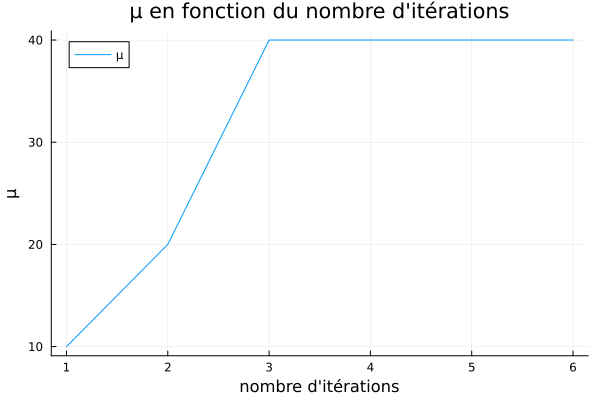

In [5]:
x0 = x03
x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f2, gf2, Hf2, c2, gc2, Hc2, x0, tol_abs=tol, tol_rel=tol, algo_noc=algo)

plot(μs, label="μ", title="μ en fonction du nombre d'itérations", xlabel="nombre d'itérations", ylabel="μ")

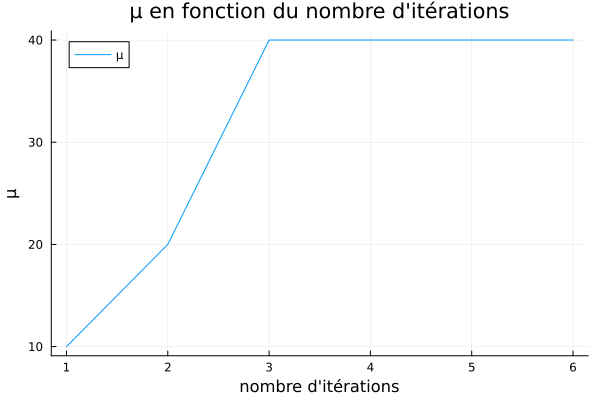

In [6]:
x0 = x04
x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f2, gf2, Hf2, c2, gc2, Hc2, x0, tol_abs=tol, tol_rel=tol, algo_noc=algo)

plot(μs, label="μ", title="μ en fonction du nombre d'itérations", xlabel="nombre d'itérations", ylabel="μ")

1. Ci-dessus sont tracées les valeurs de $\mu$ pour chaque itérations et chaque cas de test. Nous verifions que la valeur de $\mu$ augmente ou reste constante ce qui est cohérent avec sa définition. En effet, $\mu$ est doublé ($\tau = 2$) chaque fois qu'un itéré ne respecte pas les contraintes, et il reste constant si l'itéré satifait les contraintes.    

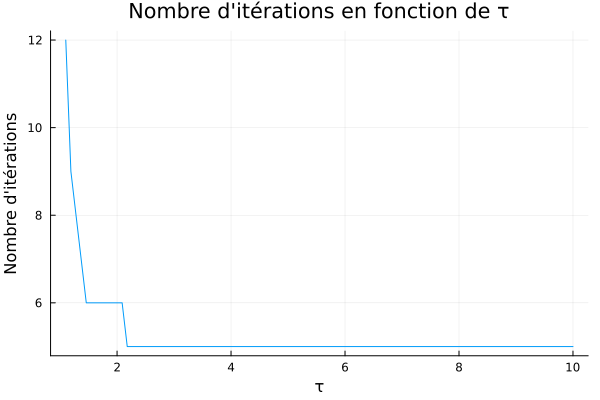

In [37]:
# 2. Inlfuence de τ dans la performance de l'algorithme

include("../test/fonctions_de_tests.jl")
include("../src/Lagrangien_Augmente.jl")

using Plots

# initialisation des paramètres

f(x) = fct2(x)
g(x) = grad_fct2(x)
h(x) = hess_fct2(x)
c(x) = contrainte2(x)
gc(x) = grad_contrainte2(x)
hc(x) = hess_contrainte2(x)

# Etude de l'influence de τ dans la performance de l'algorithme

τs = range(1.1, 10, length=100)

x0 = x03

nbs_iters = []

for i in τs 
    x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f, g, h, c, gc, hc, x0, τ=i, algo_noc="rc-gct")
    push!(nbs_iters, nb_iters)
end

plot(τs, nbs_iters, label="", xlabel="τ", ylabel="Nombre d'itérations", title="Nombre d'itérations en fonction de τ")


2. On observe que l'augmentation du facteur $\tau$ permet de réduire le nombre d'itérations nécessaires à la convergence de l'algorithme.